# 앙상블(Ensemble)

* 앙상블은 단일 결정 트리의 단점을 극복하기 위해 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 방법이다.
    * 즉, 주어진 자료로부터 여러 개의 예측 모형들을 만든 후 예측 모형들을 조합하여 하나의 최종 예측 모형을 만드는 것이다.
* 편향, 잡음 및 분산으로 인한 오류를 막고 과적합을 방지하기 위해 사용된다.
* 대표적인 앙상블 기법으로는 배깅(Bagging), 부스팅(Boosting), 랜덤포레스트(Random Forest)가 있다.

### 붓스트랩(Bootstrap)
* 랜덤샘플링의 일종으로 단순임의복원추출을 적용하여 여러 개의 동일한 크기의 표본 자료를 획득하는 방법
* 주어진 데이터를 원래의 모집단을 대표하는 독립 표본으로 가정하고, 그 자료로부터 중복을 허용한 무작위 재추출을 하여 복소위 자료를 획득하고 각각에서 통계량을 계산한다.

### 배깅(Bagging, Bootstrap Aggregationg)
* 주어진 데이터를 모집단으로 간주, 여러 개의 붓스트랩 자료를 생성하고 각각의 붓스트랩 자료에 예측 모형을 만든 후 결합하여 최종 예측 모형을 만드는 것
* 분산을 줄이고 정확도를 개선하여 모델의 안정성을 크게 높여 과적합을 방지할 수 있다.
* 배깅을 이용한 머신러닝은 '붓스트래핑 -> 모델링 -> 보팅'의 순서로 진행된다.
> 보팅
>
> 여러 개의 모형으로부터 산출된 결과 중 다수결에 의해 최종 결과를 선정하는 과정

> 부스팅과의 차이점
>
> * 주어진 자료보다 분산이 적은 앙상블 모델을 얻을 수 있다.
> * 각 붓스트랩에 대해 붓스트래핑 및 모델링 과정이 병렬적으로 수행된다.


### Out of Bag(oob)
* 배깅에서 붓스트래핑을 수행하면 평균적으로 각 예측기에 훈련데이터의 63% 정도만 샘플링된다.
    * 이때 선택되지 않은 나머지 37%를 Ount of Bag 샘플이라고 한다.
    * 단, 예측기마다 남겨진 37%의 데이터는 서로 다르다.
* oob_score
    * 선택되지 않은 37%의 데이터로 모델의 성능평가를 수행하는데 사용할 수 있다.
        * 따라서 검증세트나 교차검증이 따로 필요하지 않다.

### 부스팅(Boosting)
* 예측력이 약한 모형들을 결합해 강한 예측 모형을 만드는 방법
* 붓스트랩을 병렬로 수행하여 각 모델을 독립적으로 구축하는 배깅과 달리, 부스팅은 순차방식으로 학습을 진행한다.
* 훈련 단계에서 알고리즘은 데이터 샘플에 가중치를 할당하므로 분류 결과가 좋지 않은 데이터는 높은 가중치를, 분류 결과가 좋은 데이터는 낮은 가중치를 할당받는다.
    * 높은 가중치를 받은 데이터 샘플은 다음 붓스트래핑에서 추출될 확률이 높아진다.
        * 즉, 직전 단계에서 예측력이 약했던 부분을 다음 단계에서 개선해 나간다는 개념이다.
* 따라서 배깅에 비해 모델의 장점을 최적화하고 train 데이터에 대해 오류가 적은 결합모델을 생성할 수 있다는 장점이 있다.
* 다만, train 데이터에 과적합할 위험이 있다.

### 랜덤포레스트(Random Forest)
* 배깅과 부스팅보다 더 많은 무작위성을 주어 약한 학습기들을 생성한 후 이를 선형 결합하여 최종 학습기를 만드는 방법이다.
* 수천 개의 변수를 변수 제거 없이 모델링하므로 정확도 측면에서 좋은 성과를 보이는 기법 중 하나이다.
* 이론적 설명이나 최종 결과 해석이 어렵다는 단점이 있지만, 예측력이 매우 높은 것으로 알려져 있다.
* 입력변수가 많은 경우 배깅 및 부스팅과 비슷하거나 더 좋은 예측력을 보인다.

---

### 분류(Classifier) 실습

#### 1. 배깅(ensemble.BaggingClassifier)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

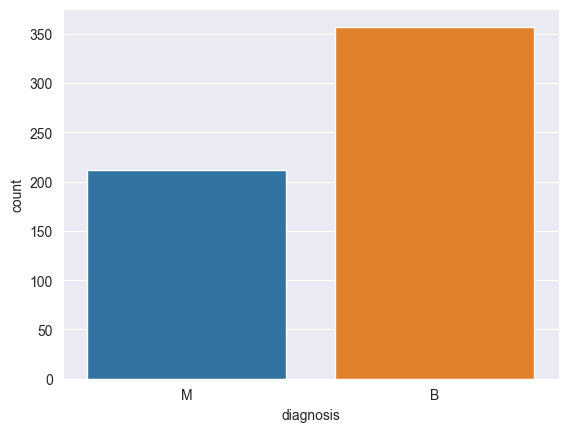

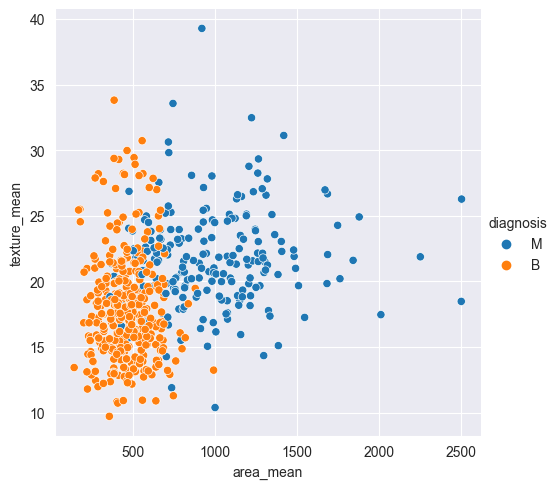

(398, 2) (171, 2) (398,) (171,)


In [1]:
import pandas as pd

breast = pd.read_csv('./data/breast-cancer.csv')
breast.info()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.countplot(x='diagnosis', data = breast)
plt.show()

# diagnosis에서 M은 악성, B는 양성을 의미한다.
# diagnosis를 타깃변수로 지정하고, 설명변수를 area_mean, texture_mean으로 설정하고 산점도를 통해 설명변수와 타깃변수 사이의 관계를 살펴보자.
sns.relplot(x='area_mean', y='texture_mean', hue = 'diagnosis', data = breast)
plt.show()

# M이면 1, B이면 0으로 변환하고 층화추출법으로 train, test 데이터를 7:3으로 분리하기
x = breast[['area_mean', 'texture_mean']]
y = breast.pop('diagnosis')
y = y.map({'M' : 1, 'B' : 0})

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y, random_state=731)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

Accuracy Score :  0.8654970760233918

=====

Confusion_matrix
          Pred[0]  Pred[1]
True[0]       96       11
True[1]       12       52

=====

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       107
           1       0.83      0.81      0.82        64

    accuracy                           0.87       171
   macro avg       0.86      0.85      0.86       171
weighted avg       0.87      0.87      0.87       171



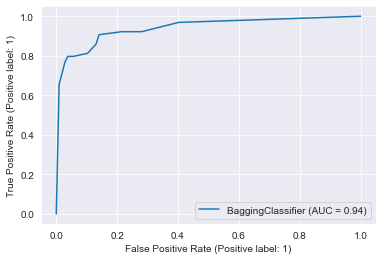

0.8787346221441125


/Users/dmis/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:791: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/Users/dmis/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:797: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(estimator = DecisionTreeClassifier())
pred = clf.fit(x_train, y_train).predict(x_test)
print('Accuracy Score : ', clf.score(x_test, y_test))
print('\n=====\n')

from sklearn.metrics import confusion_matrix
cfm = pd.DataFrame(confusion_matrix(y_test, pred),
             index = ['True[0]', 'True[1]'],
             columns = ['Pred[0]', 'Pred[1]'])
print('Confusion_matrix\n', cfm)
print('\n=====\n')

from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_auc_score
RocCurveDisplay.from_estimator(clf, x_test, y_test)
plt.show()

# oob_score를 구해 모델 평가하기
clf_oob = BaggingClassifier(estimator=DecisionTreeClassifier(), oob_score=True)
oob = clf_oob.fit(x, y).oob_score_
print(oob)

#### 2. 부스팅(ensemble.AdaBoostClassifier)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

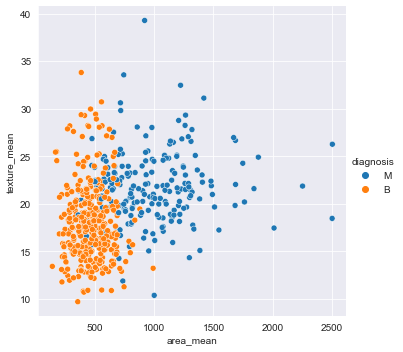

(398, 2) (171, 2) (398,) (171,)


In [154]:
import pandas as pd

breast = pd.read_csv('./data/breast-cancer.csv')
breast.info()

# diagnosis에서 M은 악성, B는 양성을 의미한다.
# diagnosis를 타깃변수로 지정하고, 설명변수를 area_mean, texture_mean으로 설정하고 산점도를 통해 설명변수와 타깃변수 사이의 관계를 살펴보자.
sns.relplot(x='area_mean', y='texture_mean', hue = 'diagnosis', data = breast)
plt.show()

# M이면 1, B이면 0으로 변환하고 층화추출법으로 train, test 데이터를 7:3으로 분리하기
x = breast[['area_mean', 'texture_mean']]
y = breast.pop('diagnosis')
y = y.map({'M' : 1, 'B' : 0})

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y, random_state=731)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

Accuracy Score :  0.8771929824561403
Confusion_matrix
          Pred[0]  Pred[1]
True[0]       98        9
True[1]       12       52

=====

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       107
           1       0.85      0.81      0.83        64

    accuracy                           0.88       171
   macro avg       0.87      0.86      0.87       171
weighted avg       0.88      0.88      0.88       171



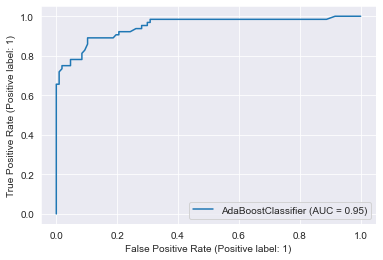

In [155]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(estimator = None)
pred = clf.fit(x_train, y_train).predict(x_test)
print('Accuracy Score : ', clf.score(x_test, y_test))

from sklearn.metrics import confusion_matrix
cfm = pd.DataFrame(confusion_matrix(y_test, pred),
             index = ['True[0]', 'True[1]'],
             columns = ['Pred[0]', 'Pred[1]'])
print('Confusion_matrix\n', cfm)
print('\n=====\n')

from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_auc_score
RocCurveDisplay.from_estimator(clf, x_test, y_test)
plt.show()

     feature_nm  importances
0     area_mean          0.6
1  texture_mean          0.4


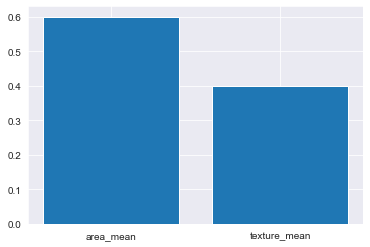

In [156]:
# 변수 중요도 파악해보기
importances = pd.DataFrame(clf.feature_importances_)
column_nm = pd.DataFrame(['area_mean', 'texture_mean'])
feature_importances = pd.concat([column_nm, importances], axis=1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

plt.bar(feature_importances.feature_nm, feature_importances.importances, width=0.8, bottom=None, align='center')
plt.show()

---

#### 3. 랜덤포레스트(ensemble.RandomForestClassifier)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

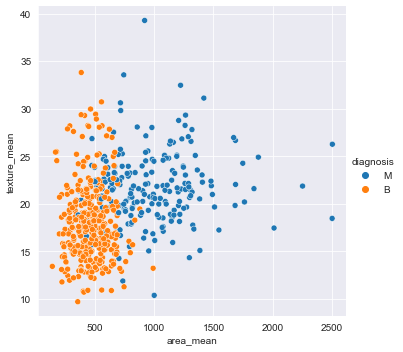

(398, 2) (171, 2) (398,) (171,)


In [157]:
import pandas as pd

breast = pd.read_csv('./data/breast-cancer.csv')
breast.info()

# diagnosis에서 M은 악성, B는 양성을 의미한다.
# diagnosis를 타깃변수로 지정하고, 설명변수를 area_mean, texture_mean으로 설정하고 산점도를 통해 설명변수와 타깃변수 사이의 관계를 살펴보자.
sns.relplot(x='area_mean', y='texture_mean', hue = 'diagnosis', data = breast)
plt.show()

# M이면 1, B이면 0으로 변환하고 층화추출법으로 train, test 데이터를 7:3으로 분리하기
x = breast[['area_mean', 'texture_mean']]
y = breast.pop('diagnosis')
y = y.map({'M' : 1, 'B' : 0})

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y, random_state=731)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

Accuracy Score :  0.8888888888888888
Confusion_matrix
          Pred[0]  Pred[1]
True[0]       98        9
True[1]       10       54

=====

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       107
           1       0.86      0.84      0.85        64

    accuracy                           0.89       171
   macro avg       0.88      0.88      0.88       171
weighted avg       0.89      0.89      0.89       171



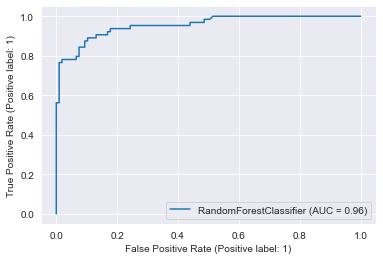

In [158]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100, min_samples_split=5, criterion='entropy', random_state=731)
pred = clf.fit(x_train, y_train).predict(x_test)
print('Accuracy Score : ', clf.score(x_test, y_test))

from sklearn.metrics import confusion_matrix
cfm = pd.DataFrame(confusion_matrix(y_test, pred),
             index = ['True[0]', 'True[1]'],
             columns = ['Pred[0]', 'Pred[1]'])
print('Confusion_matrix\n', cfm)
print('\n=====\n')

from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_auc_score
RocCurveDisplay.from_estimator(clf, x_test, y_test)
plt.show()

     feature_nm  importances
0     area_mean     0.675492
1  texture_mean     0.324508


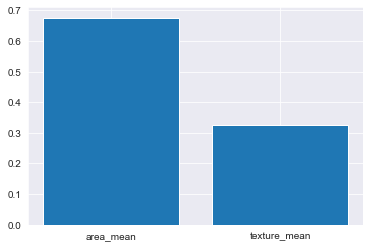

In [159]:
# 변수 중요도 파악해보기
importances = pd.DataFrame(clf.feature_importances_)
column_nm = pd.DataFrame(['area_mean', 'texture_mean'])
feature_importances = pd.concat([column_nm, importances], axis=1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

plt.bar(feature_importances.feature_nm, feature_importances.importances, width=0.8, bottom=None, align='center')
plt.show()

---

### 회귀(Regressor) 실습

#### 1. 배깅(ensemble.BaggingRegressor)

In [160]:
import pandas as pd

car = pd.read_csv('./data/CarPrice_Assignment.csv')
car.info()

# 연속형 변수인 price를 타깃변수로 설정하기
y = car.pop('price')

# car_ID, symboling을 제외한 나머지 수치형 변수를 설명변수로 지정
car_num = car.select_dtypes(['number'])
x = car_num.drop(labels=['car_ID', 'symboling'], axis=1)
x.info()
print(x.shape, y.shape)
print('\n=====\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [161]:
# 학습 및 평가
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
reg = BaggingRegressor(estimator = DecisionTreeRegressor(random_state=731,
                                                         criterion='squared_error',
                                                         max_depth=5),
                       oob_score = True)
reg = reg.fit(x, y)
print(reg.oob_score_)

0.8599816992601934


/Users/dmis/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:1255: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


---

#### 2. 부스팅(ensemble.AdaBoostRegressor)

In [162]:
import pandas as pd

car = pd.read_csv('./data/CarPrice_Assignment.csv')
car.info()

# 연속형 변수인 price를 타깃변수로 설정하기
y = car.pop('price')

# car_ID, symboling을 제외한 나머지 수치형 변수를 설명변수로 지정
car_num = car.select_dtypes(['number'])
x = car_num.drop(labels=['car_ID', 'symboling'], axis=1)
x.info()
print(x.shape, y.shape)
print('\n=====\n')

# 배깅과 달리 oob가 없으므로 train, test를 7:3의 비율로 설정
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=731)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [163]:
# 학습 및 평가
from sklearn.ensemble import AdaBoostRegressor
reg = AdaBoostRegressor(estimator = None)

pred = reg.fit(x_train, y_train).predict(x_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(x_test, y_test)

print('MSE\t{}'.format(round(mse, 3)))
print('RMSE\t{}'.format(round(rmse, 3)))
print('MAE\t{}'.format(round(mae, 3)))
print('ACC\t{}%'.format(round(acc*100, 3)))

MSE	7781956.536
RMSE	2789.616
MAE	2090.848
ACC	84.001%


          feature_nm  importances
5         enginesize     0.636553
4         curbweight     0.119516
9         horsepower     0.112261
1          carlength     0.037783
0          wheelbase     0.028442
12        highwaympg     0.013626
2           carwidth     0.011753
8   compressionratio     0.010653
11           citympg     0.007789
6          boreratio     0.007539
3          carheight     0.005449
10           peakrpm     0.005381
7             stroke     0.003255


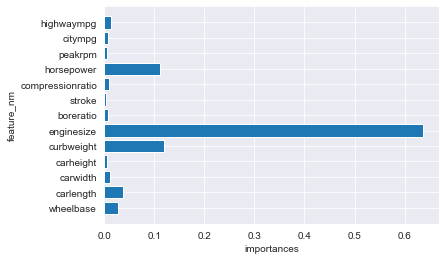

In [164]:
# 변수 중요도 파악하기
importances = pd.DataFrame(reg.feature_importances_)
column_nm = pd.DataFrame(x.columns)

feature_importances = pd.concat([column_nm, importances], axis=1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances.sort_values(by='importances', ascending = False))

# importances를 barplot으로 나타내기
import matplotlib.pyplot as plt
plt.barh(feature_importances.feature_nm, feature_importances.importances, align = 'center')
plt.xlabel('importances')
plt.ylabel('feature_nm')
plt.show()

---

#### 3. 랜덤포레스트(ensemble.RandomForestRegressor)

In [165]:
import pandas as pd

car = pd.read_csv('./data/CarPrice_Assignment.csv')
car.info()

# 연속형 변수인 price를 타깃변수로 설정하기
y = car.pop('price')

# car_ID, symboling을 제외한 나머지 수치형 변수를 설명변수로 지정
car_num = car.select_dtypes(['number'])
x = car_num.drop(labels=['car_ID', 'symboling'], axis=1)
x.info()
print(x.shape, y.shape)
print('\n=====\n')

# train, test를 7:3의 비율로 설정
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=731)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [166]:
# 학습 및 평가
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 100, max_depth = 10, random_state=731, criterion='squared_error')

pred = reg.fit(x_train, y_train).predict(x_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(x_test, y_test)

print('MSE\t{}'.format(round(mse, 3)))
print('RMSE\t{}'.format(round(rmse, 3)))
print('MAE\t{}'.format(round(mae, 3)))
print('ACC\t{}%'.format(round(acc*100, 3)))

MSE	6049275.897
RMSE	2459.528
MAE	1650.874
ACC	87.563%


          feature_nm  importances
5         enginesize     0.646376
4         curbweight     0.225929
12        highwaympg     0.025073
9         horsepower     0.024526
8   compressionratio     0.018808
1          carlength     0.014273
10           peakrpm     0.008854
11           citympg     0.008082
0          wheelbase     0.007161
2           carwidth     0.006637
6          boreratio     0.004800
7             stroke     0.004753
3          carheight     0.004727


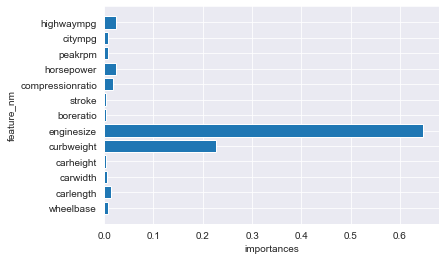

In [167]:
# 변수 중요도 파악하기
importances = pd.DataFrame(reg.feature_importances_)
column_nm = pd.DataFrame(x.columns)

feature_importances = pd.concat([column_nm, importances], axis=1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances.sort_values(by='importances', ascending = False))

# importances를 barplot으로 나타내기
import matplotlib.pyplot as plt
plt.barh(feature_importances.feature_nm, feature_importances.importances, align = 'center')
plt.xlabel('importances')
plt.ylabel('feature_nm')
plt.show()